In [0]:

# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Not Necessary cell
# List the content of your local computer folder 
!ls -la "/content/gdrive/My Drive/darknet"

total 3278
drwx------ 2 root root    4096 Sep 14 07:27 backup
drwx------ 2 root root    4096 Sep 14 05:42 bin
drwx------ 2 root root    4096 Sep 14 06:55 cfg
drwx------ 2 root root    4096 Sep 14 07:28 check
drwx------ 2 root root    4096 Sep 13 17:09 cuDNN
-rw------- 1 root root 3221752 Sep 14 11:56 darknet
drwx------ 2 root root    4096 Sep 14 05:51 img
drwx------ 2 root root    4096 Sep 14 06:06 imgt
-rw------- 1 root root     228 Sep 14 14:25 obj.data
-rw------- 1 root root       6 Sep 14 07:27 obj.names
-rw------- 1 root root   10321 Sep 14 07:24 test.txt
-rw------- 1 root root   89665 Sep 14 07:23 train.txt
drwx------ 2 root root    4096 Sep 14 07:28 weights


In [0]:

# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
#!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
#!chmod a+r /usr/local/cuda/include/cudnn.h
!chmod a+r /content/gdrive/My\ Drive/darknet/cuDNN/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
#!cat gdrive/My\ Drive/darknet/cuDNN/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

In [0]:
!cat /content/gdrive/My\ Drive/darknet/cuDNN/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [0]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.97 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (6770/6770), done.
/content/darknet/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-er

In [0]:
!git checkout feature/google-colab

Already on 'feature/google-colab'
Your branch is up to date with 'origin/feature/google-colab'.


In [0]:
#Compile Darknet
!make

chmod +x *.sh


In [0]:
#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet

In [0]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

#Makes a dir for darknet and move there
#!mkdir darknet
#%cd darknet
!ls


# Copy the Darkent compiled version to the VM local drive
#!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

3rdparty      cmake		      image_yolov2.sh	     predictions.jpg
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      CMakeSettings.json      include		     results
build	      darknet		      json_mjpeg_streams.sh  scripts
build.ps1     DarknetConfig.cmake.in  LICENSE		     src
build.sh      darknet.py	      Makefile		     video_v2.sh
cfg	      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
chart.png     data		      obj		     yolov3.weights


In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-09-14 15:59:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  20.5MB/s    in 12s     

2019-09-14 15:59:35 (19.1 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

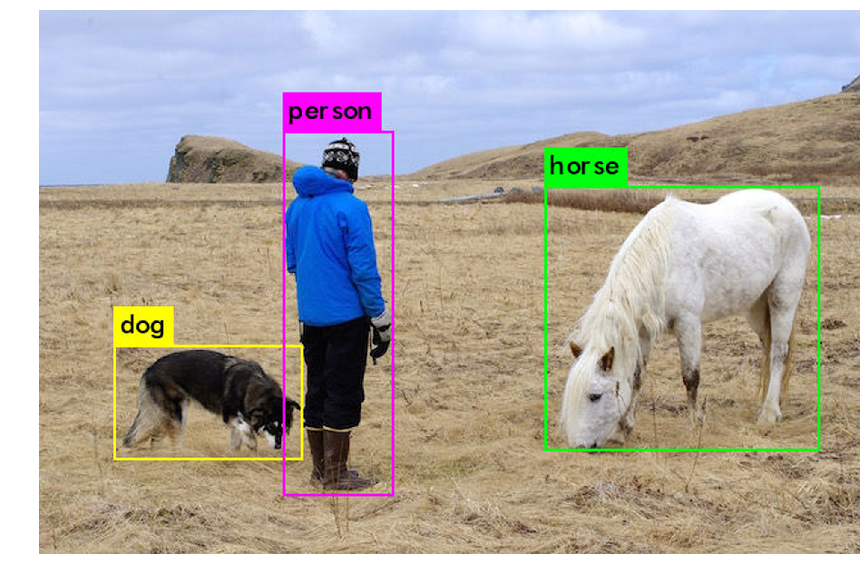

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:

!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg" "/content/gdrive/My Drive/darknet/weights/darknet53.conv.74" -dont_show

yolov3
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   480 x 480 x   3   ->   480 x 480 x  32 0.398 BF
   1 conv     64  3 x 3 / 2   480 x 480 x  32   ->   240 x 240 x  64 2.123 BF
   2 conv     32  1 x 1 / 1   240 x 240 x  64   ->   240 x 240 x  32 0.236 BF
   3 conv     64  3 x 3 / 1   240 x 240 x  32   ->   240 x 240 x  64 2.123 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   240 x 240 x  64   ->   120 x 120 x 128 2.123 BF
   6 conv     64  1 x 1 / 1   120 x 120 x 128   ->   120 x 120 x  64 0.236 BF
   7 conv    128  3 x 3 / 1   120 x 120 x  64   ->   120 x 120 x 128 2.123 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   120 x 120 x 128   ->   120 x 120 x  64 0.236 BF
  10 conv    128  3 x 3 / 1   120 x 120 x  64   ->   120 x 120 x 128 2.123 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   120 x 120 x 128   ->    60 x  60 x 256 2.123 BF
  13 conv    128  1 x 1 / 1    60 x  60 x 256   ->    60 x  60 x 128 0.236 BF

In [0]:
# Start training at the point where the last runtime finished
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/cfg/yolov3.cfg" "/content/gdrive/My Drive/darknet/weights/yolov_last.weights" -map -dont_show

 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   480 x 480 x   3   ->   480 x 480 x  32 0.398 BF
   1 conv     64  3 x 3 / 2   480 x 480 x  32   ->   240 x 240 x  64 2.123 BF
   2 conv     32  1 x 1 / 1   240 x 240 x  64   ->   240 x 240 x  32 0.236 BF
   3 conv     64  3 x 3 / 1   240 x 240 x  32   ->   240 x 240 x  64 2.123 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   240 x 240 x  64   ->   120 x 120 x 128 2.123 BF
   6 conv     64  1 x 1 / 1   120 x 120 x 128   ->   120 x 120 x  64 0.236 BF
   7 conv    128  3 x 3 / 1   120 x 120 x  64   ->   120 x 120 x 128 2.123 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   120 x 120 x 128   ->   120 x 120 x  64 0.236 BF
  10 conv    128  3 x 3 / 1   120 x 120 x  64   ->   120 x 120 x 128 2.123 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   120 x 120 x 128   ->    60 x  60 x 256 2.123 BF
  13 conv    128  1 x 1 / 1    60

In [0]:
!ls

gdrive	sample_data
